In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('forestfires.csv')

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
#check for any missing values in dataframe
df.isna().sum().sum() 

0

In [12]:
#Distingushing Numerical and Categorical Data Columns
df2=df.drop('area',axis=1)
num_columns = df2.select_dtypes(exclude='object').columns.tolist()
cat_columns = df2.select_dtypes(include='object').columns.tolist()
print(num_columns,cat_columns)

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] ['month', 'day']


In [13]:
#Encoding Categorical Data
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

38.86560000000125
0.20640000000000003


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ISI'>

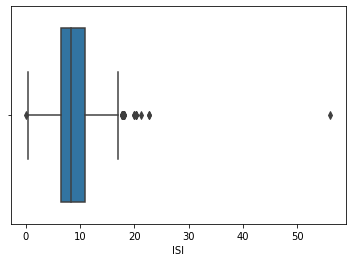

In [14]:
#Outliers Detection and Handling using Percentile Method
#1) ISI
max_ISI = df['ISI'].quantile(0.999)
print(max_ISI)
min_ISI = df['ISI'].quantile(0.001)
print(min_ISI)
sns.boxplot(df['ISI'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ISI'>

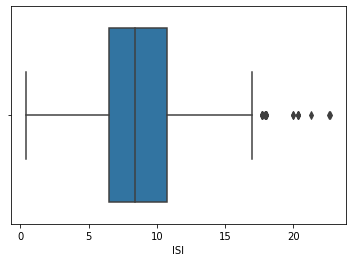

In [15]:
#Removing Outliers of ISI
df = df[df['ISI'] < max_ISI]
df = df[df['ISI'] > min_ISI]
sns.boxplot(df['ISI']) 

96.2
51.942


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC'>

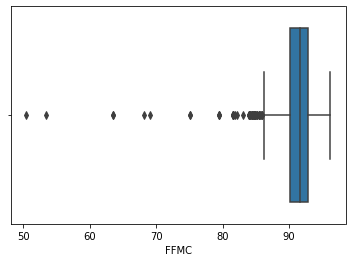

In [16]:
#2) FFMC
max_FFMC = df['FFMC'].quantile(0.999)
print(max_FFMC)
min_FFMC = df['FFMC'].quantile(0.001)
print(min_FFMC)
sns.boxplot(df['FFMC'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC'>

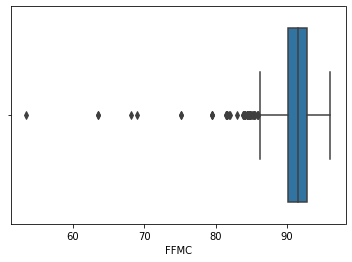

In [17]:
#Removing Outliers of FFMC
df = df[df['FFMC'] < max_FFMC]
df = df[df['FFMC'] > min_FFMC]
sns.boxplot(df['FFMC']) 

290.63570000000004
2.7066


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC'>

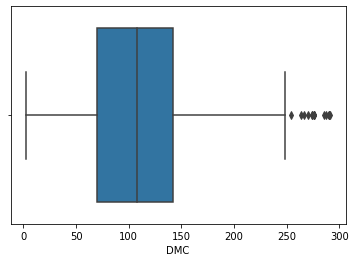

In [18]:
#3) DMC
max_DMC = df['DMC'].quantile(0.999)
print(max_DMC)
min_DMC = df['DMC'].quantile(0.001)
print(min_DMC)
sns.boxplot(df['DMC'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC'>

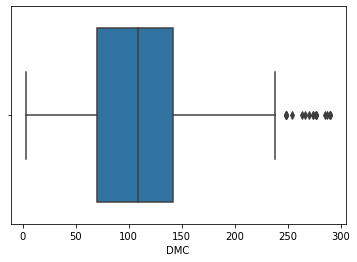

In [19]:
#Removing Outliers of DMC
df = df[df['DMC'] < max_DMC]
df = df[df['DMC'] > min_DMC]
sns.boxplot(df['DMC']) 

855.3
8.6126


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DC'>

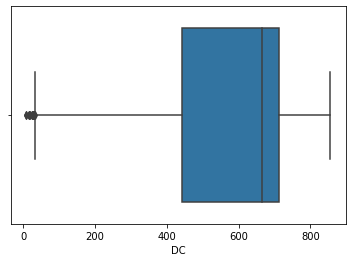

In [20]:
#4) DC
max_DC = df['DC'].quantile(0.999)
print(max_DC)
min_DC = df['DC'].quantile(0.001)
print(min_DC)
sns.boxplot(df['DC'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(505, 13)

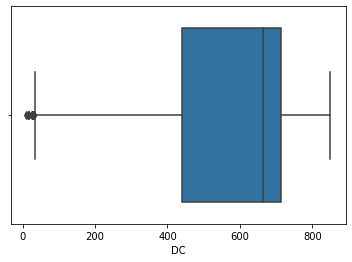

In [17]:
#Removing Outliers of DC
df = df[df['DC'] < max_DC]
df = df[df['DC'] > min_DC]
sns.boxplot(df['DC']) 

97.98200000000008
15.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH'>

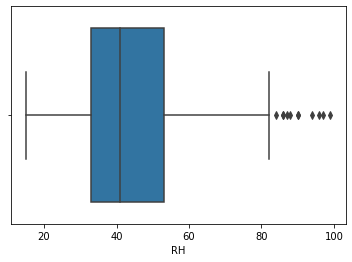

In [21]:
#5) RH
max_RH = df['RH'].quantile(0.999)
print(max_RH)
min_RH = df['RH'].quantile(0.001)
print(min_RH)
sns.boxplot(df['RH'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH'>

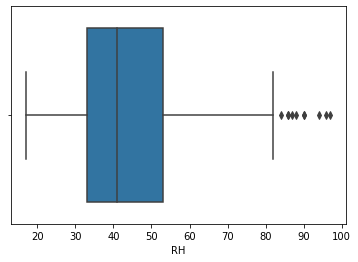

In [22]:
#Removing Outliers of RH
df = df[df['RH'] < max_RH]
df = df[df['RH'] > min_RH]
sns.boxplot(df['RH']) 


In [20]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


In [21]:
df3 = df.sample(n = 1000, replace=True, random_state=0)
print(df3)

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
176  6  5      4    4  81.5    9.1   55.2   2.7   5.8  54   5.8   0.0   4.61
49   4  4      3    1  87.6   52.2  103.8   5.0  11.0  46   5.8   0.0   0.00
121  3  4      8    1  91.5  145.4  608.2  10.7  17.1  43   5.4   0.0   0.00
196  6  5      4    4  81.5    9.1   55.2   2.7   5.8  54   5.8   0.0  10.93
330  3  3      9    6  92.2  102.3  751.5   8.4  24.2  27   3.1   0.0   6.58
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
200  1  5      9    2  91.0  129.5  692.6   7.0  21.6  33   2.2   0.0  11.53
399  9  5      6    3  93.3   49.5  297.7  14.0  28.0  34   4.5   0.0   0.00
224  7  4      9    3  90.1   82.9  735.7   6.2  15.4  57   4.5   0.0  37.71
362  7  4      9    5  88.2   55.2  732.3  11.6  15.2  64   3.1   0.0   0.52
454  3  4      8    4  91.6  248.4  753.8   6.3  16.8  56   3.1   0.0   0.00

[1000 rows x 13 columns]


In [22]:
#Saving Data Frame
#new_df=df3.to_csv("New_data_sample.csv")